In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
aggregated_data = pd.read_csv('/content/drive/MyDrive/DSCI599/599_Project/Master Data/aggregated_data.csv')

# B. Find similar players to current players (metrics could be market value, age, clean sheets, goals, assists, etc.), this will help clubs decide whether they should renew contracts of the existing players or replace them with other similar ones.


To narrow down our search, we have selected FC Barcelona as our test case. We will be looking to replace few of the players whose contracts are up for renewal in the near future. Our timeline will focus on contracts expiring in < 2 years.

## Level I: Identify contract expiration dates for the club.

In [5]:
players_2023_contract = pd.read_csv('/content/drive/MyDrive/DSCI599/599_Project/Master Data/players_2023.csv')
players_2023_contract.head()

,player_id,name,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,...,sub_ins,sub_outs,yellow_cards,red_cards,win_pct,goals_assists,goals_pct,assists_pct,avg_mins_played,age
0,3333,James Milner,England,1986-01-04,Central Midfield,Midfield,right,175,1000000,21000000,...,5,13,3,0,0.200000,2,0.000000,0.058824,47.750000,38
1,7161,Jonas Hofmann,Germany,1992-07-14,Attacking Midfield,Midfield,right,176,13000000,16000000,...,10,19,4,0,0.411765,16,0.074468,0.095745,61.147059,32
2,7825,Pepe Reina,Spain,1982-08-31,Goalkeeper,Goalkeeper,right,188,700000,22000000,...,0,0,1,0,0.363636,0,0.000000,0.000000,95.454545,42
3,12282,Daley Blind,Netherlands,1990-03-09,Centre-Back,Defender,left,180,3000000,25000000,...,2,1,6,0,0.333333,5,0.049180,0.032787,85.666667,34
4,12907,Alessio Cragno,Italy,1994-06-28,Goalkeeper,Goalkeeper,right,184,2500000,20000000,...,0,0,0,0,0.000000,0,0.000000,0.000000,97.500000,30


In [6]:
fcb = players_2023_contract[players_2023_contract['club_ids'].str.contains('131')]
non_fcb = players_2023_contract[~players_2023_contract['club_ids'].str.contains('131')]
print("Number of FCB players:",len(fcb))
print("Number of other players:", len(non_fcb))
print("\nFCB players head:")
fcb.head()

Number of FCB players: 28
Number of other players: 2322

FCB players head:


,player_id,name,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,...,sub_ins,sub_outs,yellow_cards,red_cards,win_pct,goals_assists,goals_pct,assists_pct,avg_mins_played,age
36,38253,Robert Lewandowski,Poland,1988-08-21,Centre-Forward,Attack,right,185,20000000,90000000,...,4,8,4,0,0.263158,26,0.240506,0.088608,77.105263,36
79,53622,İlkay Gündoğan,Germany,1990-10-24,Central Midfield,Midfield,right,180,18000000,50000000,...,5,6,3,0,0.243902,15,0.059524,0.119048,80.121951,33
122,66100,Oriol Romeu,Spain,1991-09-24,Defensive Midfield,Midfield,right,183,3000000,12000000,...,14,13,4,0,0.233333,1,0.000000,0.015873,41.966667,33
146,74857,Marc-André ter Stegen,Germany,1992-04-30,Goalkeeper,Goalkeeper,right,187,35000000,90000000,...,0,0,2,0,0.208333,0,0.000000,0.000000,90.000000,32
181,85370,Sergi Roberto,Spain,1992-02-07,Central Midfield,Midfield,right,178,3000000,60000000,...,7,5,5,0,0.400000,5,0.081081,0.054054,49.733333,32


In [7]:
players_for_renewal_fcb = fcb[fcb['term_days_remaining'] < 730] #2 years
players_for_renewal_non_fcb = non_fcb[non_fcb['term_days_remaining'] < 730] #2 years
print("Number of FCB players up for renewal:",len(players_for_renewal_fcb))
print("Number of other players up for renewal:", len(players_for_renewal_non_fcb))

Number of FCB players up for renewal: 10
Number of other players up for renewal: 1056


Now, let's look at FB Barcelona's players whose contracts are expiring within the next 2 years. The club needs to decide whether to renew their contracts or replace them with potentially better players for the club.

In [8]:
players_for_renewal_fcb

,player_id,name,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,...,sub_ins,sub_outs,yellow_cards,red_cards,win_pct,goals_assists,goals_pct,assists_pct,avg_mins_played,age
79,53622,İlkay Gündoğan,Germany,1990-10-24,Central Midfield,Midfield,right,180,18000000,50000000,...,5,6,3,0,0.243902,15,0.059524,0.119048,80.121951,33
181,85370,Sergi Roberto,Spain,1992-02-07,Central Midfield,Midfield,right,178,3000000,60000000,...,7,5,5,0,0.400000,5,0.081081,0.054054,49.733333,32
265,112515,Marcos Alonso,Spain,1990-12-28,Left-Back,Defender,left,188,3000000,45000000,...,3,3,0,0,0.285714,0,0.000000,0.000000,42.714286,33
410,158863,Iñigo Martínez,Spain,1991-05-17,Centre-Back,Defender,left,182,8000000,32000000,...,6,3,5,0,0.294118,0,0.000000,0.000000,62.529412,33
491,182712,João Cancelo,Portugal,1994-05-27,Right-Back,Defender,right,182,40000000,70000000,...,3,8,5,0,0.187500,8,0.063492,0.063492,78.593750,30
1550,462250,João Félix,Portugal,1999-11-10,Left Winger,Attack,right,181,40000000,100000000,...,11,18,5,0,0.212121,13,0.119403,0.074627,53.848485,24
1566,466794,Eric García,Spain,2001-01-09,Centre-Back,Defender,right,182,15000000,20000000,...,2,4,3,0,0.347826,2,0.037736,0.000000,80.347826,23
1569,466810,Ansu Fati,Spain,2002-10-31,Left Winger,Attack,right,178,30000000,80000000,...,17,8,3,0,0.192308,5,0.093023,0.023256,38.461538,21
2300,937955,Héctor Fort,Spain,2006-08-02,Right-Back,Defender,right,185,1000000,1000000,...,3,2,1,0,0.333333,2,0.000000,0.117647,57.166667,18
2302,938158,Marc Guiu,Spain,2006-01-04,Centre-Forward,Attack,right,187,2500000,2500000,...,5,2,2,0,0.142857,2,0.142857,0.000000,26.000000,18


In [9]:
players_for_renewal_fcb.columns

Index(['player_id', 'name', 'country_of_citizenship', 'date_of_birth',
       'sub_position', 'position', 'foot', 'height_in_cm',
       'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date', 'term_days_remaining', 'games_played',
       'club_ids', 'goals', 'minutes_played', 'wins', 'club_goals', 'assists',
       'clean_sheets', 'headers', 'direct_freekicks', 'penalties',
       'long_distance_kicks', 'solo_runs', 'counter_attack_goals', 'sub_ins',
       'sub_outs', 'yellow_cards', 'red_cards', 'win_pct', 'goals_assists',
       'goals_pct', 'assists_pct', 'avg_mins_played', 'age'],
      dtype='object')

## Level II and III: Seggregating players into their positions and sub-positions for further comparison with other players in the market.


### Central Midfielders

#### Initial Analysis:
1. FCB CMs up for renewal (central_mf_for_renewal_fcb) with other FCB CMs (central_mf_fcb)*italicized text*
2. FCB CMs up for renewal (central_mf_for_renewal_fcb) with other CMs up for renewal in the transfer market (central_mf_for_renewal_non_fcb)

In [50]:
# defining all dataframes

central_mf_for_renewal_fcb_ids = list(players_for_renewal_fcb[players_for_renewal_fcb['sub_position']=='Central Midfield']['player_id'])
central_mf_for_renewal_fcb = aggregated_data[aggregated_data['player_id'].isin(central_mf_for_renewal_fcb_ids)]
central_mf_for_renewal_fcb.to_csv('central_mf_for_renewal_fcb.csv',index=False)

central_mf_fcb_ids = list(fcb[(fcb['sub_position'] == 'Central Midfield') & (~fcb['player_id'].isin(central_mf_for_renewal_fcb_ids))]['player_id'])
central_mf_fcb = aggregated_data[aggregated_data['player_id'].isin(central_mf_fcb_ids)]
central_mf_fcb.to_csv('central_mf_fcb.csv',index=False)

central_mf_for_renewal_non_fcb_ids = list(players_for_renewal_non_fcb[players_for_renewal_non_fcb['sub_position']=='Central Midfield']['player_id'])
central_mf_for_renewal_non_fcb = aggregated_data[aggregated_data['player_id'].isin(central_mf_for_renewal_non_fcb_ids)]
central_mf_for_renewal_non_fcb.to_csv('central_mf_for_renewal_non_fcb.csv',index=False)

central_mf_fcb['clean_sheets_ratio'] = central_mf_fcb['clean_sheets_sum'] / central_mf_fcb['games_played_sum']
central_mf_for_renewal_fcb['clean_sheets_ratio'] = central_mf_for_renewal_fcb['clean_sheets_sum'] / central_mf_for_renewal_fcb['games_played_sum']
central_mf_for_renewal_non_fcb['clean_sheets_ratio'] = central_mf_for_renewal_non_fcb['clean_sheets_sum'] / central_mf_for_renewal_non_fcb['games_played_sum']

central_mf_fcb['date_of_birth'] = pd.to_datetime(central_mf_fcb['date_of_birth'])
central_mf_fcb['age'] = central_mf_fcb['date_of_birth'].apply(lambda x: (datetime.now() - x).days // 365)
central_mf_for_renewal_fcb['date_of_birth'] = pd.to_datetime(central_mf_for_renewal_fcb['date_of_birth'])
central_mf_for_renewal_fcb['age'] = central_mf_for_renewal_fcb['date_of_birth'].apply(lambda x: (datetime.now() - x).days // 365)
central_mf_for_renewal_non_fcb['date_of_birth'] = pd.to_datetime(central_mf_for_renewal_non_fcb['date_of_birth'])
central_mf_for_renewal_non_fcb['age'] = central_mf_for_renewal_non_fcb['date_of_birth'].apply(lambda x: (datetime.now() - x).days // 365)


central_mf_fcb['Performance Score'] = central_mf_fcb['clean_sheets_ratio'] + central_mf_fcb['assists_pct_all'] + central_mf_fcb['goals_pct_all']
central_mf_for_renewal_fcb['Performance Score'] = central_mf_for_renewal_fcb['clean_sheets_ratio'] + central_mf_for_renewal_fcb['assists_pct_all'] + central_mf_for_renewal_fcb['goals_pct_all']
central_mf_for_renewal_non_fcb['Performance Score'] = central_mf_for_renewal_non_fcb['clean_sheets_ratio'] + central_mf_for_renewal_non_fcb['assists_pct_all'] + central_mf_for_renewal_non_fcb['goals_pct_all']


<ipython-input-50-c94c5427f20d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  central_mf_fcb['clean_sheets_ratio'] = central_mf_fcb['clean_sheets_sum'] / central_mf_fcb['games_played_sum']
<ipython-input-50-c94c5427f20d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  central_mf_for_renewal_fcb['clean_sheets_ratio'] = central_mf_for_renewal_fcb['clean_sheets_sum'] / central_mf_for_renewal_fcb['games_played_sum']
<ipython-input-50-c94c5427f20d>:17: SettingWithCopyWarning: 
A value is trying to be set o

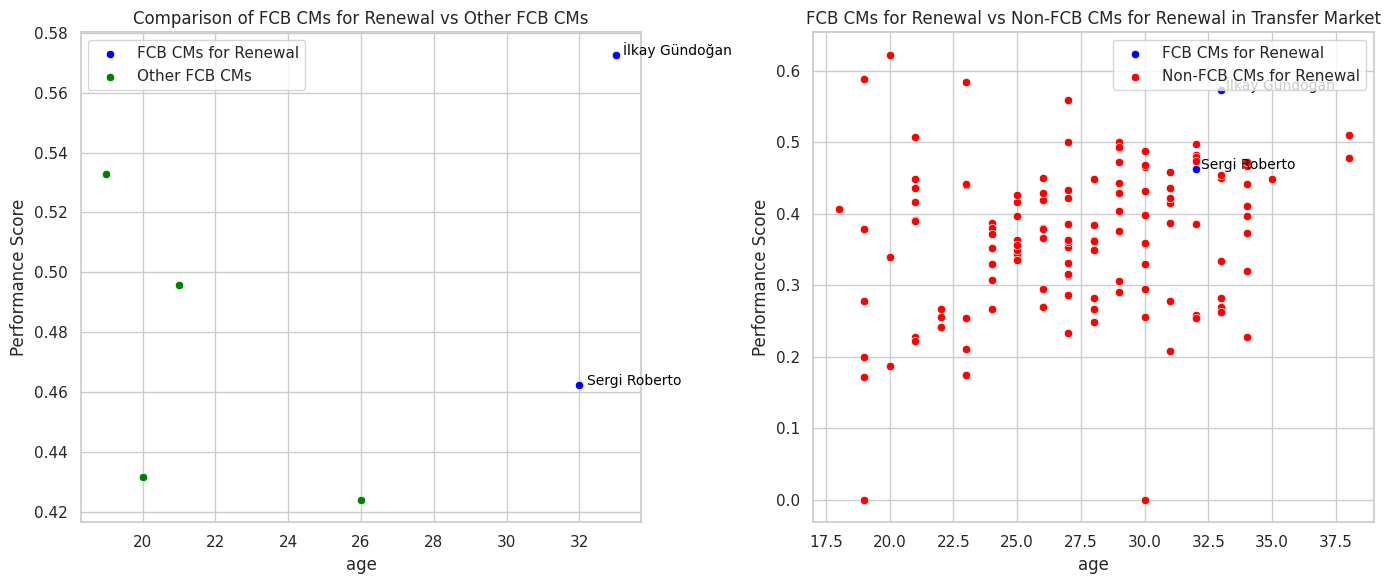

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime

# Assuming central_mf_fcb and other dataframes are already loaded and processed as you described

# Set the style of seaborn plot
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: FCB CMs up for renewal vs other FCB CMs
blue_plot_1 = sns.scatterplot(ax=axes[0], x='age', y='Performance Score', data=central_mf_for_renewal_fcb, color='blue', label='FCB CMs for Renewal')
green_plot = sns.scatterplot(ax=axes[0], x='age', y='Performance Score', data=central_mf_fcb, color='green', label='Other FCB CMs')
axes[0].set_title('Comparison of FCB CMs for Renewal vs Other FCB CMs')
axes[0].legend()

# Annotate names on the blue dots for Plot 1
for line in range(0, central_mf_for_renewal_fcb.shape[0]):
    axes[0].text(central_mf_for_renewal_fcb['age'].iloc[line]+0.2, central_mf_for_renewal_fcb['Performance Score'].iloc[line], central_mf_for_renewal_fcb['name'].iloc[line], horizontalalignment='left', size='small', color='black')

# Plot 2: FCB CMs up for renewal vs other CMs up for renewal in the transfer market
blue_plot_2 = sns.scatterplot(ax=axes[1], x='age', y='Performance Score', data=central_mf_for_renewal_fcb, color='blue', label='FCB CMs for Renewal')
red_plot = sns.scatterplot(ax=axes[1], x='age', y='Performance Score', data=central_mf_for_renewal_non_fcb, color='red', label='Non-FCB CMs for Renewal')
axes[1].set_title('FCB CMs for Renewal vs Non-FCB CMs for Renewal in Transfer Market')
axes[1].legend()

# Annotate names on the blue dots for Plot 2
for line in range(0, central_mf_for_renewal_fcb.shape[0]):
    axes[1].text(central_mf_for_renewal_fcb['age'].iloc[line]+0.2, central_mf_for_renewal_fcb['Performance Score'].iloc[line], central_mf_for_renewal_fcb['name'].iloc[line], horizontalalignment='left', size='small', color='black')

plt.tight_layout()
plt.show()


- From these two plots, we can see that our players up for renewal (in blue) are older than other players in the team and older than most players in the market.
- Gundagon seems to have the highest overall performance so it may be wise for the club to renew his contract, however, Roberto seems expendable since the club already has younger players than him with better performance.

#### Clustering all central midfield players (K-means)

In [23]:
# Combine the datasets
combined_df = pd.concat([central_mf_fcb, central_mf_for_renewal_fcb, central_mf_for_renewal_non_fcb], ignore_index=True)

# Calculate the ratio of clean_sheets_sum to games_played_sum
combined_df['clean_sheets_ratio'] = combined_df['clean_sheets_sum'] / combined_df['games_played_sum']

# Calculate the age of the players
combined_df['date_of_birth'] = pd.to_datetime(combined_df['date_of_birth'])
combined_df['age'] = combined_df['date_of_birth'].apply(lambda x: (datetime.now() - x).days // 365)

# Select the relevant features for clustering
features = combined_df[['win_pct_all', 'goals_pct_all', 'assists_pct_all', 'avg_mins_played_all', 'clean_sheets_ratio', 'age']]

# Check for missing values and replace them if necessary
features = features.fillna(features.mean())

# Display the prepared data for clustering
features.describe()


,win_pct_all,goals_pct_all,assists_pct_all,avg_mins_played_all,clean_sheets_ratio,age
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,0.175589,0.048016,0.050425,56.388541,0.272741,26.956835
std,0.091388,0.038793,0.034486,18.420482,0.121970,4.673190
min,0.000000,0.000000,0.000000,1.000000,0.000000,17.000000
25%,0.117358,0.022565,0.025702,49.610902,0.210236,23.500000
50%,0.166667,0.041420,0.046512,57.875000,0.270386,27.000000
75%,0.225726,0.066307,0.067539,71.368132,0.336879,30.000000
max,0.500000,0.183673,0.161616,84.923077,1.000000,38.000000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

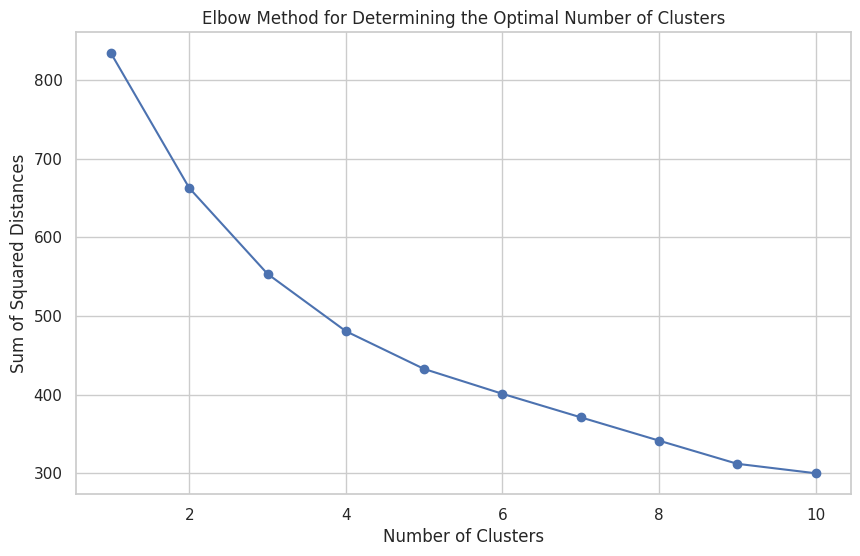

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply k-means clustering using the elbow method to determine the optimal number of clusters
sse = []
for k in range(1, 11):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Determining the Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.grid(True)
plt.show()


The elbow plot helps us identify the optimal number of clusters for k-means. From the plot, it seems like the sum of squared distances starts to level off around 3 to 4 clusters, indicating that adding more clusters beyond this range provides diminishing returns in terms of clustering quality.



In [25]:
# Final clustering with k=4
kmeans_final = KMeans(n_clusters=4, random_state=42)
clusters = kmeans_final.fit_predict(scaled_features)

# Add cluster labels to the original data
combined_df['cluster'] = clusters

# Examine the distribution of clusters and the centroid values for each cluster
cluster_counts = combined_df['cluster'].value_counts()
cluster_centroids = pd.DataFrame(scaler.inverse_transform(kmeans_final.cluster_centers_), columns=features.columns)

cluster_centroids


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,win_pct_all,goals_pct_all,assists_pct_all,avg_mins_played_all,clean_sheets_ratio,age
0,0.194690,0.035580,0.043820,62.845473,0.297794,29.253731
1,0.133967,0.098122,0.086531,66.101917,0.217081,27.794118
2,0.287404,0.036735,0.043046,41.243079,0.444393,21.000000
3,0.116002,0.018329,0.022021,33.437175,0.181522,22.833333


#### Resulting Clusters:

**Cluster Distribution:**
- Cluster 0: 67 players
- Cluster 1: 34 players
- Cluster 2: 14 players
- Cluster 3: 24 players

**Centroid Characteristics of Each Cluster:**
- Cluster 0 (Experienced, solid performance):
    - Moderate win percentage (~19%)
    - Lower goals percentage (~3.5%)
    - Moderate assists percentage (~4.4%)
    - Higher average minutes played (~63 mins)
    - Higher ratio of clean sheets (~30%)
    - Older average age (~29 years)

- Cluster 1 (High impact, offensive players):
    - Lower win percentage (~13%)
    - High goals percentage (~9.8%)
    - High assists percentage (~8.7%)
    - Higher average minutes played (~66 mins)
    - Moderate ratio of clean sheets (~22%)
    - Mid-to-late twenties average age (~28 years)

- Cluster 2 (Young, promising talents):
    - High win percentage (~29%)
    - Lower goals percentage (~3.7%)
    - Moderate assists percentage (~4.3%)
    - Lower average minutes played (~41 mins)
    - Very high ratio of clean sheets (~44%)
    - Young average age (~21 years)

- Cluster 3 (Less experienced, developing players):
    - Low win percentage (~12%)
    - Very low goals percentage (~1.8%)
    - Low assists percentage (~2.2%)
    - Lowest average minutes played (~33 mins)
    - Lower ratio of clean sheets (~18%)
    - Young average age (~23 years)

In [26]:
cluster0 = combined_df[combined_df['cluster']==0]
cluster0 = cluster0.merge(players_2023_contract[['player_id','market_value_in_eur']])
cluster1 = combined_df[combined_df['cluster']==1]
cluster1 = cluster1.merge(players_2023_contract[['player_id','market_value_in_eur']])
cluster2 = combined_df[combined_df['cluster']==2]
cluster2 = cluster2.merge(players_2023_contract[['player_id','market_value_in_eur']])
cluster3 = combined_df[combined_df['cluster']==3]
cluster3 = cluster3.merge(players_2023_contract[['player_id','market_value_in_eur']])

#### Composite Score calculated as win pct + goals pct + assists pct + avg mins played / 90 + clean sheets ratio

#### Finding potential replacements for İlkay Gündoğan

In [27]:
combined_df[combined_df['name']=="İlkay Gündoğan"]

,player_id,name,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,games_played_sum,goals_sum,...,goals_assists_sum,club_ids_all,win_pct_all,goals_pct_all,assists_pct_all,avg_mins_played_all,clean_sheets_ratio,age,Performance Score,cluster
4,53622,İlkay Gündoğan,Germany,1990-10-24,Central Midfield,Midfield,right,180.0,269,54,...,94,"[281, 131]",0.30855,0.081325,0.060241,73.052045,0.431227,33,0.572793,0


Gundagon belongs to cluster0 - Experienced, solid performance.

Finding players similar to Gundagon in his own cluster:

Nearest Neighbors for Ilkay Gundogan:
25     Piotr Zieliński
26       Adrien Rabiot
14    Yannick Gerhardt
4          Luka Modric
20        Ross Barkley
Name: name, dtype: object
[1.92118248 1.99796318 2.20057817 2.68287617 2.91133353]


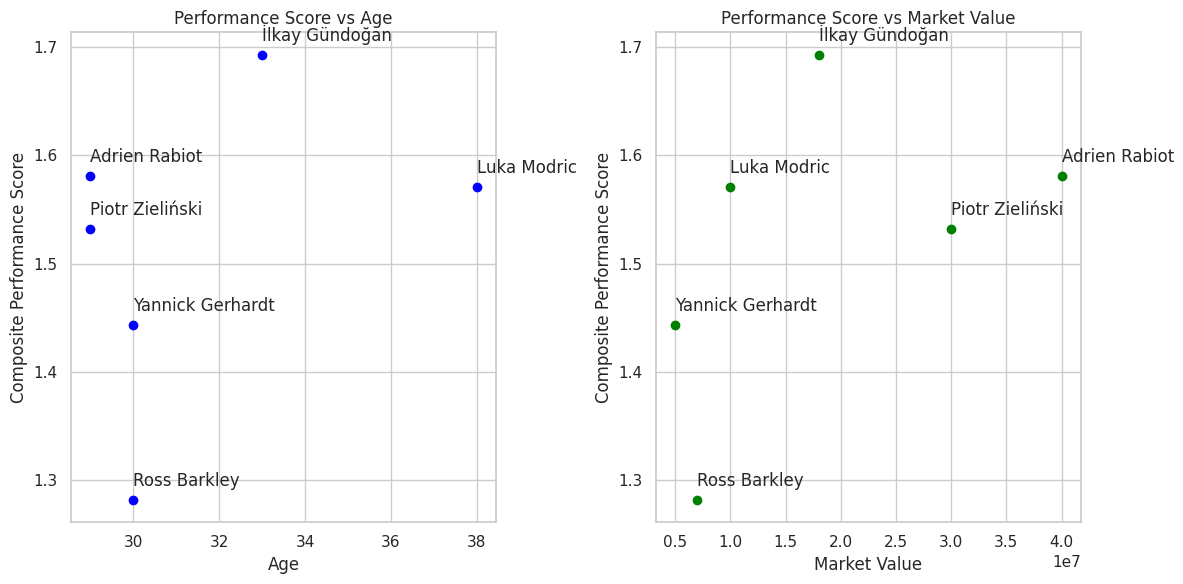

In [33]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors

def find_k_nearest_players(cluster_data, player_id, k=5):
    # Extract the metrics
    features = cluster_data[['win_pct_all', 'goals_pct_all', 'assists_pct_all',
                             'avg_mins_played_all', 'clean_sheets_ratio']]#, 'age', 'market_value_in_eur']]

    # Scale the features
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Initialize Nearest Neighbors model
    nbrs = NearestNeighbors(n_neighbors=k + 1, algorithm='auto').fit(scaled_features)

    # Find the index of the specified player
    player_index = cluster_data[cluster_data['player_id'] == player_id].index[0]

    # Find the k nearest neighbors of the specified player (excluding the player itself)
    distances, indices = nbrs.kneighbors([scaled_features[player_index]])

    # Return the names of the nearest neighbors and the distances
    nearest_neighbors = cluster_data.iloc[indices[0]][1:]  # Exclude the player itself
    return nearest_neighbors['name'], distances[0][1:]  # Exclude the distance to itself

# Example usage:
# For Ilkay Gundogan
names_gundogan, distances_gundogan = find_k_nearest_players(cluster0, 53622, k=5)
print("Nearest Neighbors for Ilkay Gundogan:")
print(names_gundogan)
print(distances_gundogan)

df = pd.concat([cluster0[cluster0['name'].isin(names_gundogan)],cluster0[cluster0['player_id']==53622]]).reset_index()

# scaler = StandardScaler()
# df[['win_pct_all', 'goals_pct_all', 'assists_pct_all', 'avg_mins_played_all', 'clean_sheets_ratio']] = scaler.fit_transform(
#     df[['win_pct_all', 'goals_pct_all', 'assists_pct_all', 'avg_mins_played_all', 'clean_sheets_ratio']])

# Composite Score = win pct + goals pct + assists pct + avg mins played / 90 + clean sheets ratio

# Calculate the composite performance score
df['avg_mins_played_all_by_90'] = df['avg_mins_played_all']/90
df['performance_score'] = df[['win_pct_all', 'goals_pct_all', 'assists_pct_all', 'avg_mins_played_all_by_90', 'clean_sheets_ratio']].sum(axis=1)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Performance vs Age
axs[0].scatter(df['age'], df['performance_score'], color='blue')
axs[0].set_title('Performance Score vs Age')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Composite Performance Score')
for i, txt in enumerate(df['name']):
    axs[0].annotate(txt, (df['age'][i], df['performance_score'][i]), textcoords="offset points", xytext=(0,10), ha='left')


# Performance vs Market Value
axs[1].scatter(df['market_value_in_eur'], df['performance_score'], color='green')
axs[1].set_title('Performance Score vs Market Value')
axs[1].set_xlabel('Market Value')
axs[1].set_ylabel('Composite Performance Score')
for i, txt in enumerate(df['name']):
    axs[1].annotate(txt, (df['market_value_in_eur'][i], df['performance_score'][i]), textcoords="offset points", xytext=(0,10), ha='left')

plt.tight_layout()
plt.show()

Insights: Rabiot and Modric come close to Gundagon in performance but Rabiot is valued higher and Modric is older than Gundagon. There seems to be no decent replacement for him.

Can we replace Gundagon with somebody from cluster2 (young, promising talents) ? \
Finding similar players to Gundagon from cluster2:

Nearest Neighbors for Ilkay Gundogan:
13    Warren Zaïre-Emery
3         Renato Sanches
2                  Pedri
1         İlkay Gündoğan
6           Ilaix Moriba
Name: name, dtype: object
[1.34048782 1.35957747 1.4596132  1.81679217 1.84227045]


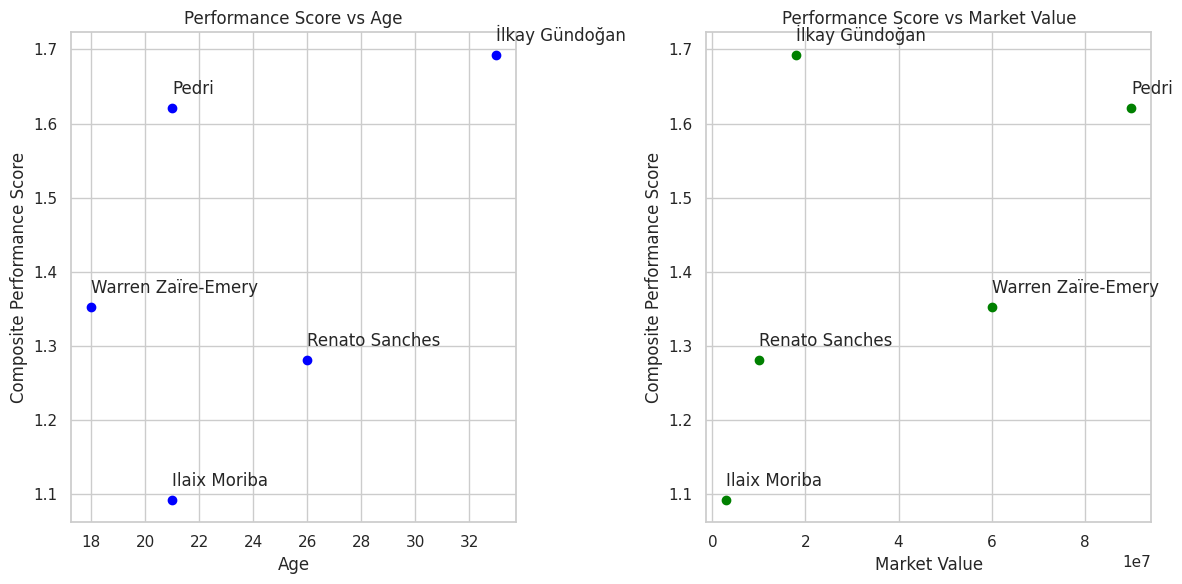

In [34]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors

def find_k_nearest_players(cluster_data, player_id, k=5):
    # Extract the metrics
    features = cluster_data[['win_pct_all', 'goals_pct_all', 'assists_pct_all',
                             'avg_mins_played_all', 'clean_sheets_ratio']]#, 'age', 'market_value_in_eur']]

    # Scale the features
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Initialize Nearest Neighbors model
    nbrs = NearestNeighbors(n_neighbors=k + 1, algorithm='auto').fit(scaled_features)

    # Find the index of the specified player
    player_index = cluster_data[cluster_data['player_id'] == player_id].index[0]

    # Find the k nearest neighbors of the specified player (excluding the player itself)
    distances, indices = nbrs.kneighbors([scaled_features[player_index]])

    # Return the names of the nearest neighbors and the distances
    nearest_neighbors = cluster_data.iloc[indices[0]][1:]  # Exclude the player itself
    return nearest_neighbors['name'], distances[0][1:]  # Exclude the distance to itself

# Example usage:
# For Ilkay Gundogan
cluster2_gundagon = pd.concat([cluster2, cluster0[cluster0['player_id']==53622]]).fillna(0)
names2_gundogan, distances2_gundogan = find_k_nearest_players(cluster2_gundagon, 53622, k=5)
print("Nearest Neighbors for Ilkay Gundogan:")
print(names2_gundogan)
print(distances2_gundogan)

df2 = pd.concat([cluster2[cluster2['name'].isin(names2_gundogan)],cluster0[cluster0['player_id']==53622]]).reset_index()

# scaler = StandardScaler()
# df[['win_pct_all', 'goals_pct_all', 'assists_pct_all', 'avg_mins_played_all', 'clean_sheets_ratio']] = scaler.fit_transform(
#     df[['win_pct_all', 'goals_pct_all', 'assists_pct_all', 'avg_mins_played_all', 'clean_sheets_ratio']])

# Composite Score = win pct + goals pct + assists pct + avg mins played / 90 + clean sheets ratio

# Calculate the composite performance score
df2['avg_mins_played_all_by_90'] = df2['avg_mins_played_all']/90
df2['performance_score'] = df2[['win_pct_all', 'goals_pct_all', 'assists_pct_all', 'avg_mins_played_all_by_90', 'clean_sheets_ratio']].sum(axis=1)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Performance vs Age
axs[0].scatter(df2['age'], df2['performance_score'], color='blue')
axs[0].set_title('Performance Score vs Age')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Composite Performance Score')
for i, txt in enumerate(df2['name']):
    axs[0].annotate(txt, (df2['age'][i], df2['performance_score'][i]), textcoords="offset points", xytext=(0,10), ha='left')


# Performance vs Market Value
axs[1].scatter(df2['market_value_in_eur'], df2['performance_score'], color='green')
axs[1].set_title('Performance Score vs Market Value')
axs[1].set_xlabel('Market Value')
axs[1].set_ylabel('Composite Performance Score')
for i, txt in enumerate(df2['name']):
    axs[1].annotate(txt, (df2['market_value_in_eur'][i], df2['performance_score'][i]), textcoords="offset points", xytext=(0,10), ha='left')

plt.tight_layout()
plt.show()

There seems to be no decent replacement for Gundagon from this pool of candidates either since he has the best performance and comparable market value to most of these players.

Finding similar players from cluster1:

Nearest Neighbors for Ilkay Gundogan:
21          Joelinton
28        Imrân Louza
9     Jordan Veretout
16        Suat Serdar
25    Conor Gallagher
Name: name, dtype: object
[0.79731488 1.03571951 1.08368273 1.08558136 1.09272468]


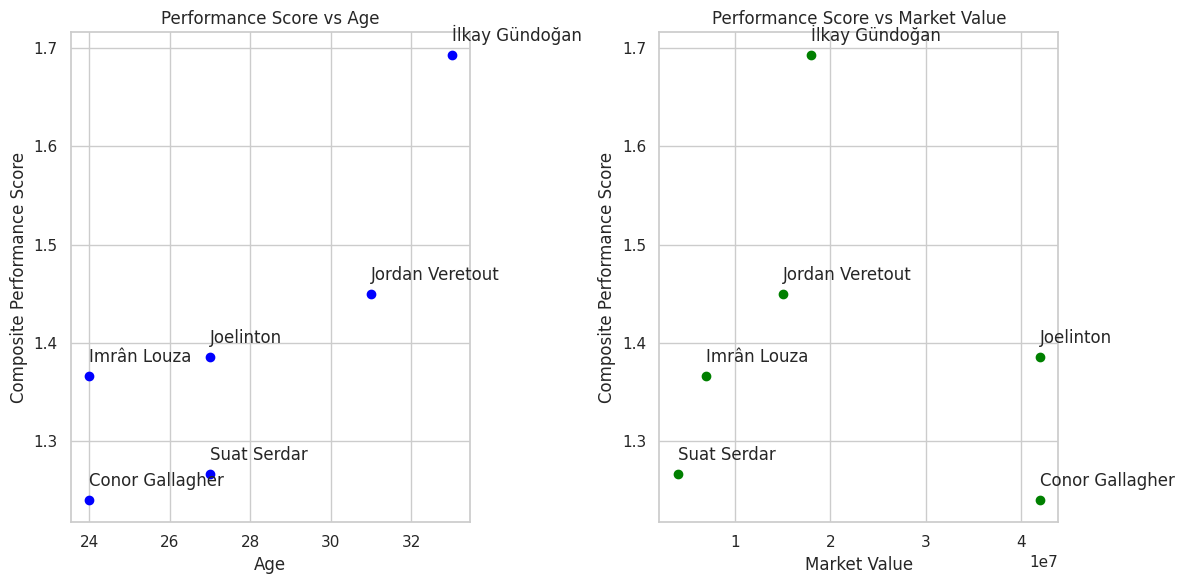

In [47]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors

def find_k_nearest_players(cluster_data, player_id, k=5):
    # Extract the metrics
    features = cluster_data[['win_pct_all', 'goals_pct_all', 'assists_pct_all',
                             'avg_mins_played_all', 'clean_sheets_ratio']]#, 'age', 'market_value_in_eur']]

    # Scale the features
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Initialize Nearest Neighbors model
    nbrs = NearestNeighbors(n_neighbors=k + 1, algorithm='auto').fit(scaled_features)

    # Find the index of the specified player
    player_index = cluster_data[cluster_data['player_id'] == player_id].index[0]

    # Find the k nearest neighbors of the specified player (excluding the player itself)
    distances, indices = nbrs.kneighbors([scaled_features[player_index]])

    # Return the names of the nearest neighbors and the distances
    nearest_neighbors = cluster_data.iloc[indices[0]][1:]  # Exclude the player itself
    return nearest_neighbors['name'], distances[0][1:]  # Exclude the distance to itself

# Example usage:
# For Ilkay Gundogan
cluster1_gundagon = pd.concat([cluster1, cluster0[cluster0['player_id']==53622]]).fillna(0)
names1_gundogan, distances1_gundogan = find_k_nearest_players(cluster1_gundagon, 53622, k=5)
print("Nearest Neighbors for Ilkay Gundogan:")
print(names1_gundogan)
print(distances1_gundogan)

df1 = pd.concat([cluster1[cluster1['name'].isin(names1_gundogan)],cluster0[cluster0['player_id']==53622]]).reset_index()

# scaler = StandardScaler()
# df[['win_pct_all', 'goals_pct_all', 'assists_pct_all', 'avg_mins_played_all', 'clean_sheets_ratio']] = scaler.fit_transform(
#     df[['win_pct_all', 'goals_pct_all', 'assists_pct_all', 'avg_mins_played_all', 'clean_sheets_ratio']])

# Composite Score = win pct + goals pct + assists pct + avg mins played / 90 + clean sheets ratio

# Calculate the composite performance score
df1['avg_mins_played_all_by_90'] = df1['avg_mins_played_all']/90
df1['performance_score'] = df1[['win_pct_all', 'goals_pct_all', 'assists_pct_all', 'avg_mins_played_all_by_90', 'clean_sheets_ratio']].sum(axis=1)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Performance vs Age
axs[0].scatter(df1['age'], df1['performance_score'], color='blue')
axs[0].set_title('Performance Score vs Age')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Composite Performance Score')
for i, txt in enumerate(df1['name']):
    axs[0].annotate(txt, (df1['age'][i], df1['performance_score'][i]), textcoords="offset points", xytext=(0,10), ha='left')


# Performance vs Market Value
axs[1].scatter(df1['market_value_in_eur'], df1['performance_score'], color='green')
axs[1].set_title('Performance Score vs Market Value')
axs[1].set_xlabel('Market Value')
axs[1].set_ylabel('Composite Performance Score')
for i, txt in enumerate(df1['name']):
    axs[1].annotate(txt, (df1['market_value_in_eur'][i], df1['performance_score'][i]), textcoords="offset points", xytext=(0,10), ha='left')

plt.tight_layout()
plt.show()

Nobody comes close to Gundagon from this pool of candidates.

#### Finding potential replacements for Sergi Roberto

In [28]:
combined_df[combined_df['name']=="Sergi Roberto"]

,player_id,name,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,games_played_sum,goals_sum,...,goals_assists_sum,club_ids_all,win_pct_all,goals_pct_all,assists_pct_all,avg_mins_played_all,clean_sheets_ratio,age,Performance Score,cluster
5,85370,Sergi Roberto,Spain,1992-02-07,Central Midfield,Midfield,right,178.0,153,11,...,27,[131],0.254902,0.033951,0.049383,64.352941,0.379085,32,0.462418,0


roberto belongs to cluster0 - Experienced, solid performance.

Finding players similar to Roberto in his own cluster:

Nearest Neighbors for Sergi Roberto:
60     Khéphren Thuram
12       Ander Herrera
0      Frenkie de Jong
61    Mattéo Guendouzi
34       Óliver Torres
Name: name, dtype: object
[1.05904812 1.32373446 1.50460324 1.53511618 1.55170251]


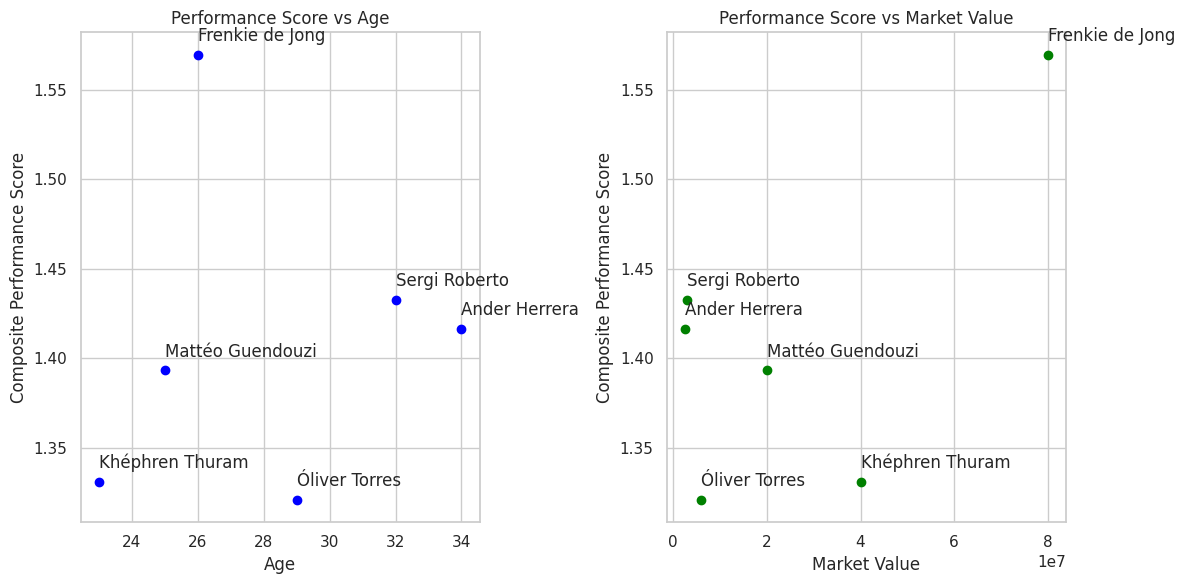

In [35]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors

def find_k_nearest_players(cluster_data, player_id, k=5):
    # Extract the metrics
    features = cluster_data[['win_pct_all', 'goals_pct_all', 'assists_pct_all',
                             'avg_mins_played_all', 'clean_sheets_ratio']]#, 'age', 'market_value_in_eur']]

    # Scale the features
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Initialize Nearest Neighbors model
    nbrs = NearestNeighbors(n_neighbors=k + 1, algorithm='auto').fit(scaled_features)

    # Find the index of the specified player
    player_index = cluster_data[cluster_data['player_id'] == player_id].index[0]

    # Find the k nearest neighbors of the specified player (excluding the player itself)
    distances, indices = nbrs.kneighbors([scaled_features[player_index]])

    # Return the names of the nearest neighbors and the distances
    nearest_neighbors = cluster_data.iloc[indices[0]][1:]  # Exclude the player itself
    return nearest_neighbors['name'], distances[0][1:]  # Exclude the distance to itself


names_roberto, distances_roberto = find_k_nearest_players(cluster0, 85370, k=5)
print("Nearest Neighbors for Sergi Roberto:")
print(names_roberto)
print(distances_roberto)

df = pd.concat([cluster0[cluster0['name'].isin(names_roberto)],cluster0[cluster0['player_id']==85370]]).reset_index()

# scaler = StandardScaler()
# df[['win_pct_all', 'goals_pct_all', 'assists_pct_all', 'avg_mins_played_all', 'clean_sheets_ratio']] = scaler.fit_transform(
#     df[['win_pct_all', 'goals_pct_all', 'assists_pct_all', 'avg_mins_played_all', 'clean_sheets_ratio']])

# Composite Score = win pct + goals pct + assists pct + avg mins played / 90 + clean sheets ratio

# Calculate the composite performance score
df['avg_mins_played_all_by_90'] = df['avg_mins_played_all']/90
df['performance_score'] = df[['win_pct_all', 'goals_pct_all', 'assists_pct_all', 'avg_mins_played_all_by_90', 'clean_sheets_ratio']].sum(axis=1)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Performance vs Age
axs[0].scatter(df['age'], df['performance_score'], color='blue')
axs[0].set_title('Performance Score vs Age')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Composite Performance Score')
for i, txt in enumerate(df['name']):
    axs[0].annotate(txt, (df['age'][i], df['performance_score'][i]), textcoords="offset points", xytext=(0,10), ha='left')


# Performance vs Market Value
axs[1].scatter(df['market_value_in_eur'], df['performance_score'], color='green')
axs[1].set_title('Performance Score vs Market Value')
axs[1].set_xlabel('Market Value')
axs[1].set_ylabel('Composite Performance Score')
for i, txt in enumerate(df['name']):
    axs[1].annotate(txt, (df['market_value_in_eur'][i], df['performance_score'][i]), textcoords="offset points", xytext=(0,10), ha='left')

plt.tight_layout()
plt.show()

Herrera seems like a decent replacement for Roberto, although his performance is slightly lower. He could be bought at a lower price than Roberto.

Can we replace roberto with somebody from cluster2 (young, promising talents) ? \
Finding similar players to roberto from cluster2:

Nearest Neighbors for Ilkay roberto:
13    Warren Zaïre-Emery
2          Sergi Roberto
3         Renato Sanches
1                   Gavi
0           Fermín López
Name: name, dtype: object
[1.31620811 1.47334411 1.50045269 1.58698667 2.01917521]


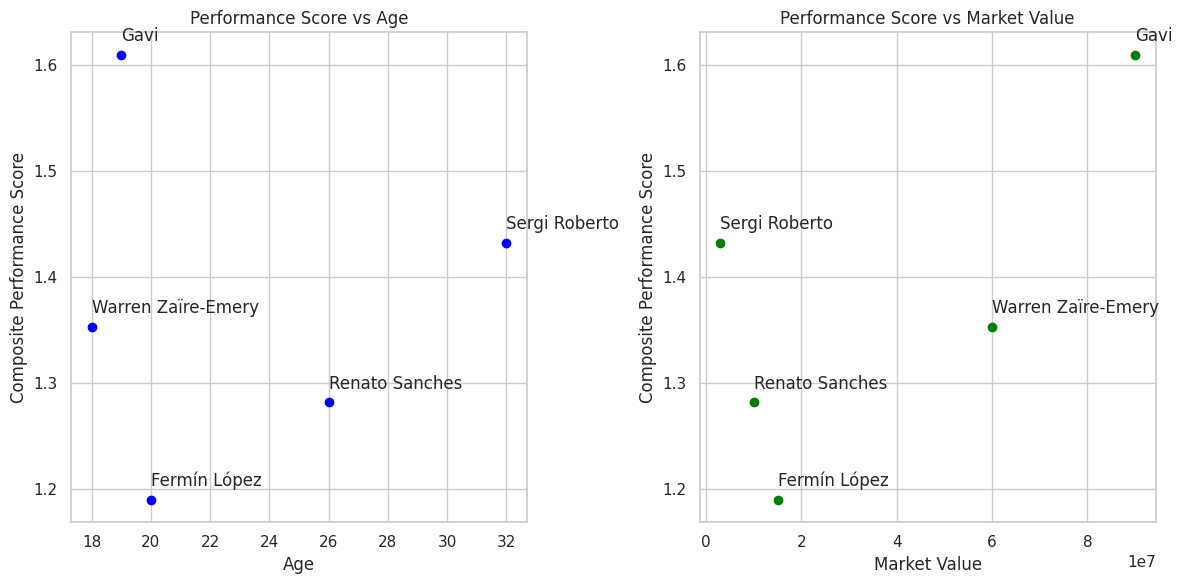

In [36]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors

def find_k_nearest_players(cluster_data, player_id, k=5):
    # Extract the metrics
    features = cluster_data[['win_pct_all', 'goals_pct_all', 'assists_pct_all',
                             'avg_mins_played_all', 'clean_sheets_ratio']]#, 'age', 'market_value_in_eur']]

    # Scale the features
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Initialize Nearest Neighbors model
    nbrs = NearestNeighbors(n_neighbors=k + 1, algorithm='auto').fit(scaled_features)

    # Find the index of the specified player
    player_index = cluster_data[cluster_data['player_id'] == player_id].index[0]

    # Find the k nearest neighbors of the specified player (excluding the player itself)
    distances, indices = nbrs.kneighbors([scaled_features[player_index]])

    # Return the names of the nearest neighbors and the distances
    nearest_neighbors = cluster_data.iloc[indices[0]][1:]  # Exclude the player itself
    return nearest_neighbors['name'], distances[0][1:]  # Exclude the distance to itself

cluster2_roberto = pd.concat([cluster2, cluster0[cluster0['player_id']==85370]]).fillna(0)
names2_roberto, distances2_roberto = find_k_nearest_players(cluster2_roberto, 85370, k=5)
print("Nearest Neighbors for Sergi Roberto:")
print(names2_roberto)
print(distances2_roberto)

df2 = pd.concat([cluster2[cluster2['name'].isin(names2_roberto)],cluster0[cluster0['player_id']==85370]]).reset_index()

# scaler = StandardScaler()
# df[['win_pct_all', 'goals_pct_all', 'assists_pct_all', 'avg_mins_played_all', 'clean_sheets_ratio']] = scaler.fit_transform(
#     df[['win_pct_all', 'goals_pct_all', 'assists_pct_all', 'avg_mins_played_all', 'clean_sheets_ratio']])

# Composite Score = win pct + goals pct + assists pct + avg mins played / 90 + clean sheets ratio

# Calculate the composite performance score
df2['avg_mins_played_all_by_90'] = df2['avg_mins_played_all']/90
df2['performance_score'] = df2[['win_pct_all', 'goals_pct_all', 'assists_pct_all', 'avg_mins_played_all_by_90', 'clean_sheets_ratio']].sum(axis=1)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Performance vs Age
axs[0].scatter(df2['age'], df2['performance_score'], color='blue')
axs[0].set_title('Performance Score vs Age')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Composite Performance Score')
for i, txt in enumerate(df2['name']):
    axs[0].annotate(txt, (df2['age'][i], df2['performance_score'][i]), textcoords="offset points", xytext=(0,10), ha='left')


# Performance vs Market Value
axs[1].scatter(df2['market_value_in_eur'], df2['performance_score'], color='green')
axs[1].set_title('Performance Score vs Market Value')
axs[1].set_xlabel('Market Value')
axs[1].set_ylabel('Composite Performance Score')
for i, txt in enumerate(df2['name']):
    axs[1].annotate(txt, (df2['market_value_in_eur'][i], df2['performance_score'][i]), textcoords="offset points", xytext=(0,10), ha='left')

plt.tight_layout()
plt.show()

Nobody from this pool seems like a good replacement for Roberto.

Finding similar players from cluster1:

Nearest Neighbors for Sergi Roberto:
9       Jordan Veretout
22         Mikel Merino
10        Morgan Sanson
18           Javi Muñoz
3     Christian Eriksen
Name: name, dtype: object
[1.25597498 1.28143734 1.35762313 1.39498522 1.49505294]


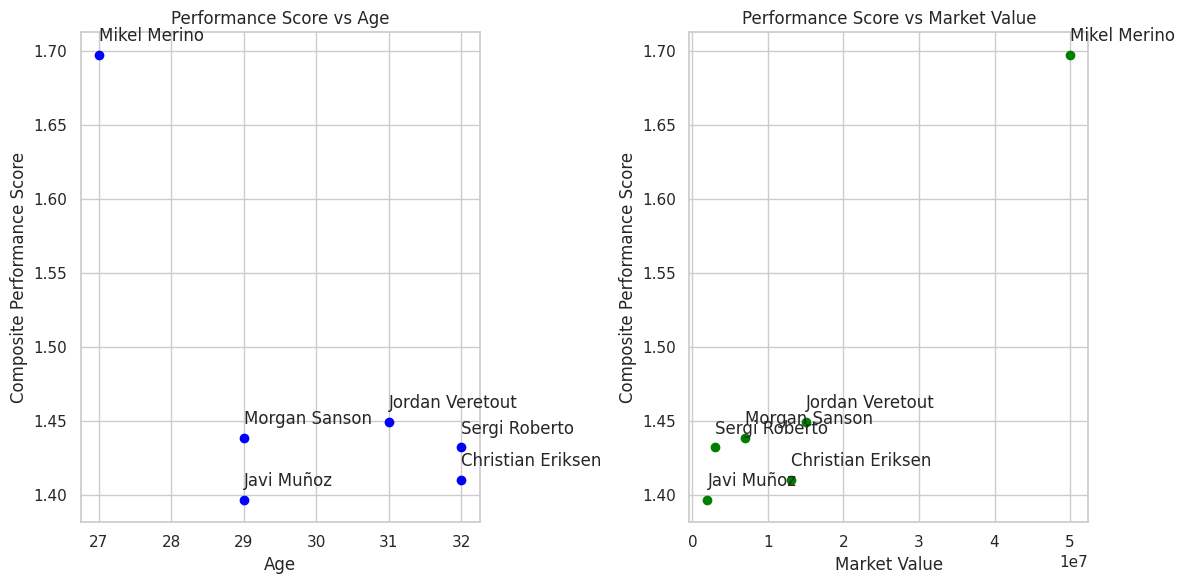

In [46]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors

def find_k_nearest_players(cluster_data, player_id, k=5):
    # Extract the metrics
    features = cluster_data[['win_pct_all', 'goals_pct_all', 'assists_pct_all',
                             'avg_mins_played_all', 'clean_sheets_ratio']]#, 'age', 'market_value_in_eur']]

    # Scale the features
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Initialize Nearest Neighbors model
    nbrs = NearestNeighbors(n_neighbors=k + 1, algorithm='auto').fit(scaled_features)

    # Find the index of the specified player
    player_index = cluster_data[cluster_data['player_id'] == player_id].index[0]

    # Find the k nearest neighbors of the specified player (excluding the player itself)
    distances, indices = nbrs.kneighbors([scaled_features[player_index]])

    # Return the names of the nearest neighbors and the distances
    nearest_neighbors = cluster_data.iloc[indices[0]][1:]  # Exclude the player itself
    return nearest_neighbors['name'], distances[0][1:]  # Exclude the distance to itself

cluster1_roberto = pd.concat([cluster1, cluster0[cluster0['player_id']==85370]]).fillna(0)
names1_roberto, distances1_roberto = find_k_nearest_players(cluster1_roberto, 85370, k=5)
print("Nearest Neighbors for Sergi Roberto:")
print(names1_roberto)
print(distances1_roberto)

df1 = pd.concat([cluster1[cluster1['name'].isin(names1_roberto)],cluster0[cluster0['player_id']==85370]]).reset_index()

# scaler = StandardScaler()
# df[['win_pct_all', 'goals_pct_all', 'assists_pct_all', 'avg_mins_played_all', 'clean_sheets_ratio']] = scaler.fit_transform(
#     df[['win_pct_all', 'goals_pct_all', 'assists_pct_all', 'avg_mins_played_all', 'clean_sheets_ratio']])

# Composite Score = win pct + goals pct + assists pct + avg mins played / 90 + clean sheets ratio

# Calculate the composite performance score
df1['avg_mins_played_all_by_90'] = df1['avg_mins_played_all']/90
df1['performance_score'] = df1[['win_pct_all', 'goals_pct_all', 'assists_pct_all', 'avg_mins_played_all_by_90', 'clean_sheets_ratio']].sum(axis=1)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Performance vs Age
axs[0].scatter(df1['age'], df1['performance_score'], color='blue')
axs[0].set_title('Performance Score vs Age')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Composite Performance Score')
for i, txt in enumerate(df1['name']):
    axs[0].annotate(txt, (df1['age'][i], df1['performance_score'][i]), textcoords="offset points", xytext=(0,10), ha='left')


# Performance vs Market Value
axs[1].scatter(df1['market_value_in_eur'], df1['performance_score'], color='green')
axs[1].set_title('Performance Score vs Market Value')
axs[1].set_xlabel('Market Value')
axs[1].set_ylabel('Composite Performance Score')
for i, txt in enumerate(df1['name']):
    axs[1].annotate(txt, (df1['market_value_in_eur'][i], df1['performance_score'][i]), textcoords="offset points", xytext=(0,10), ha='left')

plt.tight_layout()
plt.show()

Muno and Sanson seem like decent repplacements for Roberto given that they are slightly younger and have around the same performance and market value.

### Central Midfielder Conclusion:
- gundagon is the goat, renew his contract

- but roberto meh ok ok can replace with younger players if needed, or we can retain him and give him less game time and more time to the already present better players in the club

##